In [1]:
# -*- coding: utf-8 -*-

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, fbeta_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 표기

import seaborn as sns
%matplotlib inline  

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

df1.head()

Using TensorFlow backend.


,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,1,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0
1,2,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0.0,0.0,0.0
2,3,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0.0,0.0,0.0
3,4,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0.0,0.0,0.0
4,5,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0.0,0.0,0.0


In [2]:
df2.head()

,Unnamed: 0,plant2_train.mea_ddhr,plant2_train.tem_in_loc1,plant2_train.hum_in_loc1,plant2_train.tem_coil_loc1,plant2_train.tem_in_loc2,plant2_train.hum_in_loc2,plant2_train.tem_coil_loc2,plant2_train.tem_in_loc3,plant2_train.hum_in_loc3,plant2_train.tem_coil_loc3,plant2_train.tem_out_loc1,plant2_train.hum_out_loc1,plant2_train.cond_loc1,plant2_train.cond_loc2,plant2_train.cond_loc3
0,1,2016-07-19 18:00,22.39,55.46,27.46,22.48,56.17,29.71,21.94,56.32,30.70,17.72,62.94,0.0,0.0,0.0
1,2,2016-07-19 21:00,17.81,62.64,27.08,18.09,61.94,27.88,17.75,61.78,28.61,11.37,76.95,0.0,0.0,0.0
2,3,2016-07-20 0:00,15.13,66.70,26.93,15.49,66.42,26.74,15.89,64.87,27.27,9.79,79.46,0.0,0.0,0.0
3,4,2016-07-20 3:00,13.82,68.53,26.47,14.03,69.14,26.01,14.64,67.06,26.93,8.35,81.56,0.0,0.0,0.0
4,5,2016-07-20 6:00,12.93,73.87,26.20,13.05,74.48,25.51,13.69,71.83,26.47,7.68,89.10,0.0,0.0,0.0


In [3]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df = pd.concat([df1, df2], axis=1, join='inner') # 교집합 합치기


In [6]:
df.describe()

,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,...,plant2_train.hum_in_loc2,plant2_train.tem_coil_loc2,plant2_train.tem_in_loc3,plant2_train.hum_in_loc3,plant2_train.tem_coil_loc3,plant2_train.tem_out_loc1,plant2_train.hum_out_loc1,plant2_train.cond_loc1,plant2_train.cond_loc2,plant2_train.cond_loc3
count,57044.000000,57044.000000,57044.000000,57794.000000,57794.000000,57794.000000,57769.000000,57769.000000,57794.000000,57794.000000,...,57690.000000,57690.000000,57690.000000,57690.000000,57690.000000,57690.000000,57690.000000,57690.000000,57690.000000,57690.000000
mean,17.526760,50.497979,16.454955,16.324730,53.032637,15.548209,15.451213,56.624094,14.872983,13.415867,...,51.630919,16.156671,16.641337,50.422042,17.269363,13.890598,63.480946,0.004680,0.004715,0.000520
std,9.925289,12.787766,9.989942,10.214179,13.658370,10.234295,10.209580,13.525159,10.443377,10.910398,...,13.978753,9.858937,9.948342,13.541020,10.015580,11.308166,20.538925,0.068252,0.068503,0.022798
min,-7.980000,10.000000,-7.610000,-8.280000,8.000000,-6.040000,-8.930000,9.000000,-7.450000,-13.690000,...,12.820000,-4.590000,-7.000000,10.710000,-4.400000,-14.270000,6.140000,0.000000,0.000000,0.000000
25%,8.570000,40.750000,7.120000,7.040000,42.700000,6.130000,6.180000,46.340000,5.250000,3.830000,...,40.780000,7.010000,7.777500,39.960000,8.000000,4.080000,46.950000,0.000000,0.000000,0.000000
50%,17.140000,50.340000,15.980000,15.740000,53.140000,15.060000,15.000000,56.750000,14.530000,12.930000,...,51.800000,15.400000,15.980000,50.180000,16.590000,13.140000,62.670000,0.000000,0.000000,0.000000
75%,26.420000,60.100000,25.590000,25.570000,63.580000,25.060000,24.650000,67.090000,24.600000,23.000000,...,62.550000,25.590000,25.810000,60.840000,26.890000,23.490000,80.890000,0.000000,0.000000,0.000000
max,37.080000,89.800000,34.860000,36.530000,91.420000,34.060000,35.920000,93.160000,33.680000,38.570000,...,88.550000,33.640000,36.650000,84.650000,35.240000,43.420000,99.510000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57914 entries, 0 to 57913
Data columns (total 30 columns):
plant1_train.mea_ddhr         57914 non-null object
plant1_train.tem_in_loc1      57044 non-null float64
plant1_train.hum_in_loc1      57044 non-null float64
plant1_train.tem_coil_loc1    57044 non-null float64
plant1_train.tem_in_loc2      57794 non-null float64
plant1_train.hum_in_loc2      57794 non-null float64
plant1_train.tem_coil_loc2    57794 non-null float64
plant1_train.tem_in_loc3      57769 non-null float64
plant1_train.hum_in_loc3      57769 non-null float64
plant1_train.tem_coil_loc3    57794 non-null float64
plant1_train.tem_out_loc1     57794 non-null float64
plant1_train.hum_out_loc1     57794 non-null float64
plant1_train.cond_loc1        57044 non-null float64
plant1_train.cond_loc2        57794 non-null float64
plant1_train.cond_loc3        57769 non-null float64
plant2_train.mea_ddhr         57914 non-null object
plant2_train.tem_in_loc1      57690 non-null 

In [8]:
# 문자열 피처의 값 분류 확인
print('plant1_train.mea_ddhr :\n', df['plant1_train.mea_ddhr'].value_counts())
print('plant1_train.tem_in_loc1 :\n', df['plant1_train.tem_in_loc1'].value_counts())
print('plant1_train.hum_in_loc1 :\n', df['plant1_train.hum_in_loc1'].value_counts())
print('plant1_train.tem_coil_loc1 :\n', df['plant1_train.tem_coil_loc1'].value_counts())
print('plant1_train.tem_in_loc2 :\n', df['plant1_train.tem_in_loc2'].value_counts())  
print('plant1_train.hum_in_loc2 :\n', df['plant1_train.hum_in_loc2'].value_counts())  
print('plant1_train.tem_coil_loc2 :\n', df['plant1_train.tem_coil_loc2'].value_counts())
print('plant1_train.tem_in_loc3 :\n', df['plant1_train.tem_in_loc3'].value_counts())
print('plant1_train.hum_in_loc3 :\n', df['plant1_train.hum_in_loc3'].value_counts())
print('plant1_train.tem_coil_loc3 :\n', df['plant1_train.tem_coil_loc3'].value_counts())
print('plant1_train.tem_out_loc1 :\n', df['plant1_train.tem_out_loc1'].value_counts())
print('plant1_train.hum_out_loc1 :\n', df['plant1_train.hum_out_loc1'].value_counts())
print('TARGET_cond_loc1 :\n', df['plant1_train.cond_loc1'].value_counts())
print('TARGET_cond_loc2 :\n', df['plant1_train.cond_loc2'].value_counts())
print('TARGET_cond_loc3 :\n', df['plant1_train.cond_loc3'].value_counts())


#print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

plant1_train.mea_ddhr :
 2018-07-07 16:50    1
2018-11-06 11:30    1
2018-08-29 11:50    1
2017-08-24 19:00    1
2018-10-08 15:30    1
2019-01-06 11:20    1
2019-02-10 12:40    1
2018-08-07 18:20    1
2019-02-05 2:30     1
2018-09-03 20:20    1
2017-01-07 17:00    1
2017-11-24 21:00    1
2016-07-15 6:00     1
2019-03-05 22:00    1
2018-07-29 10:40    1
2017-10-21 10:00    1
2019-02-19 17:10    1
2018-06-13 5:50     1
2018-07-06 9:20     1
2018-06-21 4:00     1
2017-10-24 9:00     1
2017-10-01 7:00     1
2019-01-16 2:10     1
2018-04-17 4:30     1
2018-06-20 1:50     1
2018-07-05 0:30     1
2018-12-25 6:30     1
2018-09-08 2:20     1
2018-09-21 18:40    1
2018-07-10 3:50     1
                   ..
2018-12-20 23:20    1
2018-09-29 2:10     1
2018-09-24 15:10    1
2017-01-06 14:00    1
2018-11-24 5:40     1
2017-12-05 13:00    1
2018-10-27 21:40    1
2017-06-05 20:00    1
2019-01-09 10:50    1
2019-02-16 13:40    1
2018-06-13 16:00    1
2018-10-20 13:30    1
2017-06-15 11:00    1
2019-01

Name: plant1_train.hum_in_loc3, Length: 2241, dtype: int64
plant1_train.tem_coil_loc3 :
  6.89     199
 7.12     152
 7.24     148
 15.56    147
 24.94    146
 7.20     146
 25.02    144
 23.00    144
 7.16     142
 3.80     142
 24.98    142
 25.06    139
 7.73     139
 2.16     138
 2.77     137
 24.90    136
 7.31     132
 2.89     132
 24.26    131
 3.77     129
 7.54     129
 4.11     128
 3.46     127
 1.17     126
 2.20     125
 2.74     124
 3.61     123
 7.58     122
 7.77     122
 24.87    121
         ... 
-6.73       1
-6.46       1
-5.09       1
-5.13       1
-5.28       1
-5.43       1
-6.38       1
-6.92       1
-4.13       1
-6.61       1
-5.77       1
-5.24       1
-6.69       1
 33.68      1
-4.21       1
-7.45       1
-6.96       1
-6.84       1
-6.23       1
-4.67       1
-5.81       1
-5.47       1
-7.11       1
-5.35       1
-5.54       1
-4.02       1
-4.06       1
-5.05       1
-4.86       1
-6.16       1
Name: plant1_train.tem_coil_loc3, Length: 1061, dtype: in

In [9]:
df_re = pd.read_csv('C:/Users/fu/공모전/plant_train.csv')


In [10]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116663 entries, 0 to 116662
Data columns (total 16 columns):
Unnamed: 0                    116663 non-null int64
plant1_train.mea_ddhr         116663 non-null object
plant1_train.tem_in_loc1      115569 non-null float64
plant1_train.hum_in_loc1      115569 non-null float64
plant1_train.tem_coil_loc1    115569 non-null float64
plant1_train.tem_in_loc2      116319 non-null float64
plant1_train.hum_in_loc2      116319 non-null float64
plant1_train.tem_coil_loc2    116319 non-null float64
plant1_train.tem_in_loc3      116294 non-null float64
plant1_train.hum_in_loc3      116294 non-null float64
plant1_train.tem_coil_loc3    116319 non-null float64
plant1_train.tem_out_loc1     116319 non-null float64
plant1_train.hum_out_loc1     116319 non-null float64
plant1_train.cond_loc1        115569 non-null float64
plant1_train.cond_loc2        116319 non-null float64
plant1_train.cond_loc3        116294 non-null float64
dtypes: float64(14), int64(1

In [11]:

print('plant1_train.mea_ddhr :\n', df_re['plant1_train.mea_ddhr'].value_counts())
print('plant1_train.tem_in_loc1 :\n', df_re['plant1_train.tem_in_loc1'].value_counts())
print('plant1_train.hum_in_loc1 :\n', df_re['plant1_train.hum_in_loc1'].value_counts())
print('plant1_train.tem_coil_loc1 :\n', df_re['plant1_train.tem_coil_loc1'].value_counts())
print('plant1_train.tem_in_loc2 :\n', df_re['plant1_train.tem_in_loc2'].value_counts())  
print('plant1_train.hum_in_loc2 :\n', df_re['plant1_train.hum_in_loc2'].value_counts())  
print('plant1_train.tem_coil_loc2 :\n', df_re['plant1_train.tem_coil_loc2'].value_counts())
print('plant1_train.tem_in_loc3 :\n', df_re['plant1_train.tem_in_loc3'].value_counts())
print('plant1_train.hum_in_loc3 :\n', df_re['plant1_train.hum_in_loc3'].value_counts())
print('plant1_train.tem_coil_loc3 :\n', df_re['plant1_train.tem_coil_loc3'].value_counts())
print('plant1_train.tem_out_loc1 :\n', df_re['plant1_train.tem_out_loc1'].value_counts())
print('plant1_train.hum_out_loc1 :\n', df_re['plant1_train.hum_out_loc1'].value_counts())
print('TARGET_cond_loc1 :\n', df_re['plant1_train.cond_loc1'].value_counts())
print('TARGET_cond_loc2 :\n', df_re['plant1_train.cond_loc2'].value_counts())
print('TARGET_cond_loc3 :\n', df_re['plant1_train.cond_loc3'].value_counts())


#print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

plant1_train.mea_ddhr :
 2018-07-07 16:50    2
2018-11-19 18:10    2
2018-09-11 13:40    2
2017-03-09 2:00     2
2019-01-16 20:30    2
2019-02-17 19:00    2
2018-06-23 6:10     2
2017-07-07 2:00     2
2019-03-23 16:40    2
2017-05-17 8:00     2
2018-07-30 7:00     2
2018-11-22 11:00    2
2017-02-28 13:00    2
2019-01-27 14:20    2
2019-02-17 15:30    2
2018-07-20 6:00     2
2017-07-17 8:00     2
2017-04-14 19:00    2
2017-02-23 23:00    2
2019-01-14 21:50    2
2017-12-26 9:00     2
2019-01-29 21:30    2
2018-04-03 11:00    2
2018-01-20 16:00    2
2017-11-26 12:00    2
2018-01-09 8:00     2
2018-10-27 15:10    2
2017-12-09 8:00     2
2018-12-12 23:40    2
2019-02-20 22:00    2
                   ..
2016-05-30 3:00     1
2016-05-30 15:00    1
2016-04-24 0:00     1
2016-04-03 9:00     1
2016-05-16 18:00    1
2016-06-18 21:00    1
2016-05-12 0:00     1
2017-04-27 16:00    1
2016-04-14 0:00     1
2016-05-30 6:00     1
2017-04-29 5:00     1
2016-05-12 12:00    1
2016-04-11 12:00    1
2016-04

In [12]:
df_re.isnull().sum()

Unnamed: 0                       0
plant1_train.mea_ddhr            0
plant1_train.tem_in_loc1      1094
plant1_train.hum_in_loc1      1094
plant1_train.tem_coil_loc1    1094
plant1_train.tem_in_loc2       344
plant1_train.hum_in_loc2       344
plant1_train.tem_coil_loc2     344
plant1_train.tem_in_loc3       369
plant1_train.hum_in_loc3       369
plant1_train.tem_coil_loc3     344
plant1_train.tem_out_loc1      344
plant1_train.hum_out_loc1      344
plant1_train.cond_loc1        1094
plant1_train.cond_loc2         344
plant1_train.cond_loc3         369
dtype: int64

In [13]:
df_re['plant1_train.tem_in_loc1'] = df_re['plant1_train.tem_in_loc1'].fillna(df_re['plant1_train.tem_in_loc1'].mean())
df_re['plant1_train.hum_in_loc1'] = df_re['plant1_train.hum_in_loc1'].fillna(df_re['plant1_train.hum_in_loc1'].mean())
df_re['plant1_train.tem_coil_loc1'] = df_re['plant1_train.tem_coil_loc1'].fillna(df_re['plant1_train.tem_coil_loc1'].mean())
df_re['plant1_train.tem_in_loc2'] = df_re['plant1_train.tem_in_loc2'].fillna(df_re['plant1_train.tem_in_loc2'].mean())
df_re['plant1_train.hum_in_loc2'] = df_re['plant1_train.hum_in_loc2'].fillna(df_re['plant1_train.hum_in_loc2'].mean())
df_re['plant1_train.tem_coil_loc2'] = df_re['plant1_train.tem_coil_loc2'].fillna(df_re['plant1_train.tem_coil_loc2'].mean())
df_re['plant1_train.tem_in_loc3'] = df_re['plant1_train.tem_in_loc3'].fillna(df_re['plant1_train.tem_in_loc3'].mean())
df_re['plant1_train.hum_in_loc3'] = df_re['plant1_train.hum_in_loc3'].fillna(df_re['plant1_train.hum_in_loc3'].mean())
df_re['plant1_train.tem_coil_loc3'] = df_re['plant1_train.tem_coil_loc3'].fillna(df_re['plant1_train.tem_coil_loc3'].mean())
df_re['plant1_train.tem_out_loc1'] = df_re['plant1_train.tem_out_loc1'].fillna(df_re['plant1_train.tem_out_loc1'].mean())
df_re['plant1_train.hum_out_loc1'] = df_re['plant1_train.hum_out_loc1'].fillna(df_re['plant1_train.hum_out_loc1'].mean())
df_re['plant1_train.cond_loc1'] = df_re['plant1_train.cond_loc1'].fillna(df_re['plant1_train.cond_loc1'].max())
df_re['plant1_train.cond_loc2'] = df_re['plant1_train.cond_loc2'].fillna(df_re['plant1_train.cond_loc2'].max())
df_re['plant1_train.cond_loc3'] = df_re['plant1_train.cond_loc3'].fillna(df_re['plant1_train.cond_loc3'].max())

# 시간에서 시/분/초 를 분리 후 int 형식으로 변환

# 이후 스케일링

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_re['plant1_train.mea_ddhr'] = rob_scaler.fit_transform(df_re['plant1_train.mea_ddhr'].values.reshape(-1,1))



In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['plant1_train.hum_out_loc1'].values
time_val = df_re['plant1_train.mea_ddhr'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [14]:
df_re.drop(['plant1_train.mea_ddhr'], axis=1, inplace=True)

In [15]:
df_re.rename(columns={"plant1_train.cond_loc1":"TARGET"},inplace=True)

In [16]:
df_re['TARGET'].describe()

count    116663.000000
mean          0.014049
std           0.117693
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [20]:
total_len = len(df_re['TARGET'])
percentage_labels = (df_re['TARGET'].value_counts()/total_len)*100
percentage_labels

df_re['TARGET'].value_counts()

0.0    115024
1.0      1639
Name: TARGET, dtype: int64

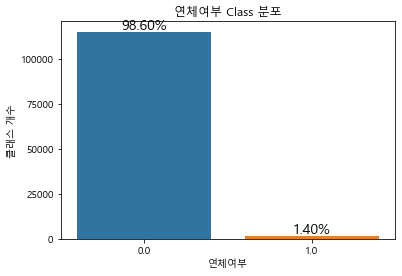

In [21]:
sns.countplot(df_re.TARGET).set_title('연체여부 Class 분포')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           '{:.2f}%'.format(100*(height/total_len)),
           fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("연체여부")
ax.set_ylabel("클래스 개수")
plt.show()

In [23]:
X = df_re[['plant1_train.tem_in_loc1','plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','plant1_train.tem_out_loc1','plant1_train.hum_out_loc1']]
y = df_re['TARGET']

In [24]:
print(X)

        plant1_train.tem_in_loc1  plant1_train.hum_in_loc1  \
0                      16.000000                 24.000000   
1                      14.000000                 28.000000   
2                      13.000000                 33.000000   
3                      13.000000                 33.000000   
4                      16.000000                 28.000000   
5                      18.000000                 24.000000   
6                      17.000000                 28.000000   
7                      16.000000                 38.000000   
8                      15.000000                 41.000000   
9                      14.000000                 41.000000   
10                     13.000000                 38.000000   
11                     14.000000                 41.000000   
12                     17.000000                 35.000000   
13                     19.000000                 32.000000   
14                     19.000000                 40.000000   
15      

In [25]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_re['plant1_train.tem_in_loc1'] = rob_scaler.fit_transform(df_re['plant1_train.tem_in_loc1'].values.reshape(-1,1))
df_re['plant1_train.hum_in_loc1'] = rob_scaler.fit_transform(df_re['plant1_train.hum_in_loc1'].values.reshape(-1,1))
df_re['plant1_train.tem_coil_loc1'] = rob_scaler.fit_transform(df_re['plant1_train.tem_coil_loc1'].values.reshape(-1,1))
df_re['plant1_train.tem_out_loc1'] = rob_scaler.fit_transform(df_re['plant1_train.tem_out_loc1'].values.reshape(-1,1))
df_re['plant1_train.hum_out_loc1'] = rob_scaler.fit_transform(df_re['plant1_train.hum_out_loc1'].values.reshape(-1,1))

In [26]:

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [  2405   2406   2407 ... 116660 116661 116662] Test: [    0     1     2 ... 23949 23950 23951]
Train: [     0      1      2 ... 116660 116661 116662] Test: [ 2405  2406  2407 ... 47122 47123 47124]
Train: [     0      1      2 ... 116660 116661 116662] Test: [ 2733  2734  2735 ... 70281 70282 70283]
Train: [     0      1      2 ... 116660 116661 116662] Test: [41825 41826 41827 ... 93397 93398 93399]
Train: [    0     1     2 ... 93397 93398 93399] Test: [ 73355  73356  73357 ... 116660 116661 116662]


In [27]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.98594266 0.01405734]
[0.98598431 0.01401569]


# SMOTE Technique (Over-Sampling):

In [28]:
print(original_Xtrain.shape)
print(original_Xtest.shape)

(93332, 5)
(23331, 5)


In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(original_Xtrain, original_ytrain)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', original_Xtrain.shape, original_ytrain.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (93332, 5) (93332,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (184040, 5) (184040,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    92020
0.0    92020
dtype: int64


In [30]:
sm_columns=['TARGET']
sm_df = pd.DataFrame(y_train_over, columns=sm_columns)

Text(0.5, 1.0, 'It has the same number of 34780 classes \n (0: 안얼음 || 1: 얼음)')

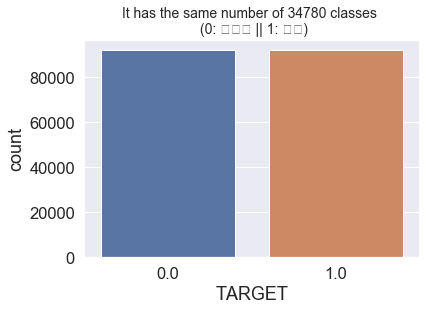

In [32]:
sns.countplot('TARGET', data=sm_df)
plt.title('It has the same number of 34780 classes \n (0: 안얼음 || 1: 얼음)', fontsize=14)

In [33]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=156)


# 결정트리 학습/예측/평가
dt_clf.fit(X_train_over, y_train_over)
tree_clf = dt_clf.predict(original_Xtest)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(original_ytest, tree_clf)))


# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train_over, y_train_over)
grid_dclf = rf_clf.predict(original_Xtest)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(original_ytest, grid_dclf)))


# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train_over, y_train_over)
log_reg = lr_clf.predict(original_Xtest)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(original_ytest, log_reg)))





DecisionTreeClassifier 정확도: 0.9934
RandomForestClassifier 정확도: 0.9950
LogisticRegression 정확도: 0.9683


In [34]:
# 결정트리 교차 검증을 위한 cross_val_score() API 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train_over, y_train_over, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("결정트리 교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

# 정확도가 다른 이유는. cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문.

결정트리 교차 검증 0 정확도: 0.9969
결정트리 교차 검증 1 정확도: 0.9999
결정트리 교차 검증 2 정확도: 0.9979
결정트리 교차 검증 3 정확도: 0.9948
결정트리 교차 검증 4 정확도: 0.9996
평균 정확도: 0.9978


In [35]:
# 랜덤포레스트 교차 검증을 위한 cross_val_score() API 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X_train_over, y_train_over, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("랜덤포레스트 교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

# 정확도가 다른 이유는. cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문.

랜덤포레스트 교차 검증 0 정확도: 0.9985
랜덤포레스트 교차 검증 1 정확도: 0.9999
랜덤포레스트 교차 검증 2 정확도: 0.9983
랜덤포레스트 교차 검증 3 정확도: 0.9946
랜덤포레스트 교차 검증 4 정확도: 0.9999
평균 정확도: 0.9983


In [36]:
# LR 교차 검증을 위한 cross_val_score() API 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_train_over, y_train_over, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("LR 교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

# 정확도가 다른 이유는. cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문.

LR 교차 검증 0 정확도: 0.8499
LR 교차 검증 1 정확도: 0.8827
LR 교차 검증 2 정확도: 0.7415
LR 교차 검증 3 정확도: 0.9036
LR 교차 검증 4 정확도: 0.9309
평균 정확도: 0.8617


In [37]:
# GridSearchCV로 결정트리분류의 최적 하이퍼 파라미터 찾고 예측 성능 측정.

# 단계1. CV에 5개 폴드세트 지정
# 단계2. max_depth, min_samples_split, min_samples_leaf 하이퍼 파라미터를 변경하면서 성능 측정
# 단계3. 최적 하이퍼 파라미터와 그때의 예측을 출력
# 단계4. 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측 수행.

from sklearn.model_selection import GridSearchCV



# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(dt_clf, tree_params, scoring='accuracy', cv=5)
grid_tree.fit(X_train_over, y_train_over)

# tree best estimator
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_tree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_tree.best_score_))
tree_clf = grid_tree.best_estimator_


# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
tree_clf_best = tree_clf.predict(original_Xtest)
accuracy = accuracy_score(original_ytest, tree_clf_best)
print('테스트 세트에서의 Decision Tree 정확도 : {0:.4f}'.format(accuracy))
print('-'*100)



#-----------------------------------------------------------------------#


parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train_over, y_train_over)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
rf_clf_best = best_dclf.predict(original_Xtest)
accuracy = accuracy_score(original_ytest, rf_clf_best)
print('테스트 세트에서의 Random Forest 정확도 : {0:.4f}'.format(accuracy))
print('-'*100)




#-----------------------------------------------------------------------#



# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(lr_clf, log_reg_params, scoring='accuracy', cv=5)
grid_log_reg.fit(X_train_over, y_train_over)
# We automatically get the logistic regression with the best parameters.

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_log_reg.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_log_reg.best_score_))
log_reg = grid_log_reg.best_estimator_



# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
lr_clf_best = log_reg.predict(original_Xtest)
accuracy = accuracy_score(original_ytest, lr_clf_best)
print('테스트 세트에서의 Logistic Regression 정확도 : {0:.4f}'.format(accuracy))
print('-'*100)


GridSearchCV 최적 하이퍼 파라미터 : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
GridSearchCV 최고 정확도: 0.9299
테스트 세트에서의 Decision Tree 정확도 : 0.6485
----------------------------------------------------------------------------------------------------
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9967
테스트 세트에서의 Random Forest 정확도 : 0.9878
----------------------------------------------------------------------------------------------------
GridSearchCV 최적 하이퍼 파라미터 : {'C': 100, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.8618
테스트 세트에서의 Logistic Regression 정확도 : 0.9684
----------------------------------------------------------------------------------------------------


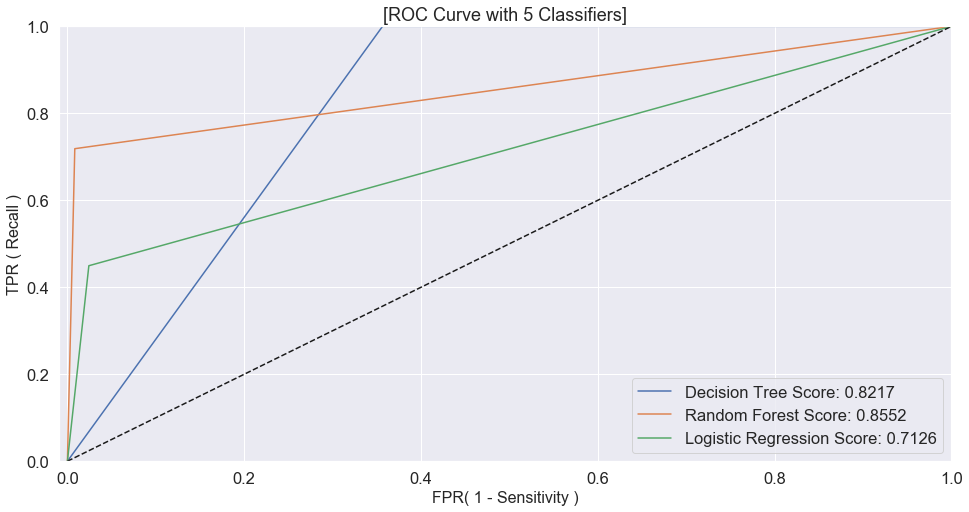

In [38]:
from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, dt_thresholds = roc_curve(original_ytest, tree_clf_best)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(original_ytest, rf_clf_best)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(original_ytest, lr_clf_best)



def graph_roc_curve_multiple(dt_fpr, dt_tpr, rf_fpr, rf_tpr, lr_fpr, lr_tpr):
    plt.figure(figsize=(16,8))
    plt.title('[ROC Curve with 5 Classifiers]', fontsize=18)
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree Score: {:.4f}'.format(roc_auc_score(original_ytest, tree_clf_best)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(original_ytest, rf_clf_best)))
    plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(original_ytest, lr_clf_best)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('FPR( 1 - Sensitivity )', fontsize=16)
    plt.ylabel('TPR ( Recall )', fontsize=16)
    #plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
    #            arrowprops=dict(facecolor='#6E726D', shrink=0.05),
    #            )
    plt.legend()
    
graph_roc_curve_multiple(dt_fpr, dt_tpr, rf_fpr, rf_tpr, lr_fpr, lr_tpr)
plt.show()

In [39]:
roc_score = roc_auc_score(original_ytest, tree_clf_best)
print('Decision Tree ROC AUC 값: {0:.4f}'.format(roc_score))

roc_score = roc_auc_score(original_ytest, rf_clf_best)
print('Random Forest ROC AUC 값: {0:.4f}'.format(roc_score))

roc_score = roc_auc_score(original_ytest, lr_clf_best)
print('Logistic Regression ROC AUC 값: {0:.4f}'.format(roc_score))

Decision Tree ROC AUC 값: 0.8217
Random Forest ROC AUC 값: 0.8552
Logistic Regression ROC AUC 값: 0.7126


In [40]:
# 오차행렬, 정확도, 정밀도, 재현율을 한 번에 불러오기 위해 get_clf_eval 함수 제작

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(original_ytest, tree_clf_best ):
    confusion = confusion_matrix(original_ytest, tree_clf_best )   # 오차행렬
    accuracy = accuracy_score(original_ytest, tree_clf_best )  # 정확도
    precision = precision_score(original_ytest, tree_clf_best ) # 정밀도
    recall = recall_score(original_ytest, tree_clf_best ) # 재현율
     # F1 스코어 추가
    f1 = f1_score(original_ytest, tree_clf_best )
    # F1 스코어 추가완료
    print('오차 행렬')
    print(confusion)
    # F1 스코어 print
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

print("Decision Tree 의 값 :\n")
get_clf_eval(original_ytest, tree_clf_best)

Decision Tree 의 값 :

오차 행렬
[[14803  8201]
 [    0   327]]
정확도: 0.6485, 정밀도: 0.0383, 재현율: 1.0000, F1: 0.0739


In [41]:
# 오차행렬, 정확도, 정밀도, 재현율을 한 번에 불러오기 위해 get_clf_eval 함수 제작

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(original_ytest, rf_clf_best  ):
    confusion = confusion_matrix(original_ytest, rf_clf_best  )   # 오차행렬
    accuracy = accuracy_score(original_ytest, rf_clf_best  )  # 정확도
    precision = precision_score(original_ytest, rf_clf_best  ) # 정밀도
    recall = recall_score(original_ytest, rf_clf_best  ) # 재현율
     # F1 스코어 추가
    f1 = f1_score(original_ytest, rf_clf_best  )
    # F1 스코어 추가완료
    print('오차 행렬')
    print(confusion)
    # F1 스코어 print
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

print("Random Forest 의 값 :\n")
get_clf_eval(original_ytest, rf_clf_best )

Random Forest 의 값 :

오차 행렬
[[22812   192]
 [   92   235]]
정확도: 0.9878, 정밀도: 0.5504, 재현율: 0.7187, F1: 0.6233


In [42]:
# 오차행렬, 정확도, 정밀도, 재현율을 한 번에 불러오기 위해 get_clf_eval 함수 제작

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(original_ytest, lr_clf_best   ):
    confusion = confusion_matrix(original_ytest, lr_clf_best   )   # 오차행렬
    accuracy = accuracy_score(original_ytest, lr_clf_best   )  # 정확도
    precision = precision_score(original_ytest, lr_clf_best   ) # 정밀도
    recall = recall_score(original_ytest, lr_clf_best   ) # 재현율
     # F1 스코어 추가
    f1 = f1_score(original_ytest, lr_clf_best   )
    # F1 스코어 추가완료
    print('오차 행렬')
    print(confusion)
    # F1 스코어 print
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

print("Logistic Regression 의 값 :\n")
get_clf_eval(original_ytest, lr_clf_best  )

Logistic Regression 의 값 :

오차 행렬
[[22446   558]
 [  180   147]]
정확도: 0.9684, 정밀도: 0.2085, 재현율: 0.4495, F1: 0.2849


In [44]:
feature_names = X.columns.tolist()

In [45]:
target_name = np.array(y)

In [46]:
from sklearn.tree import export_graphviz
from sklearn import tree

tree.export_graphviz(dt_clf , out_file="tree.dot", feature_names = feature_names, impurity=True, rounded = True, filled=True, special_characters = True)

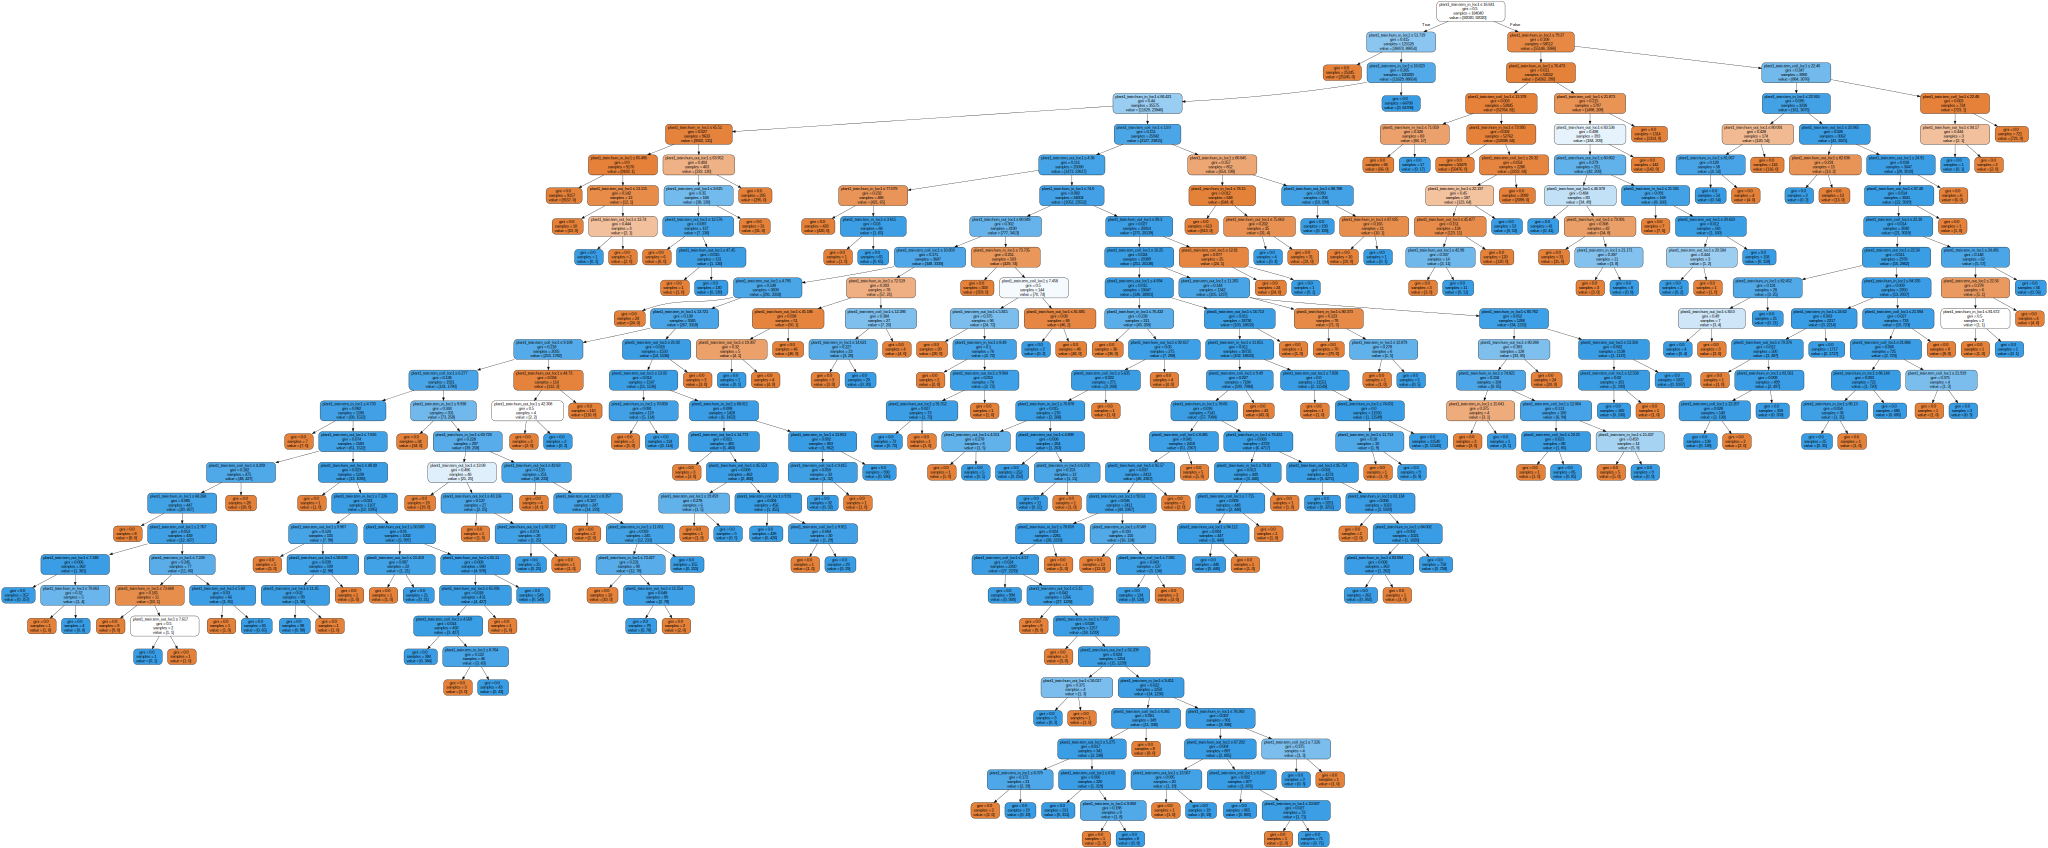

In [47]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [48]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" ")
    else:
        print(' ')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

 
[[22812   192]
 [   92   235]]
 
[[23004     0]
 [    0   327]]


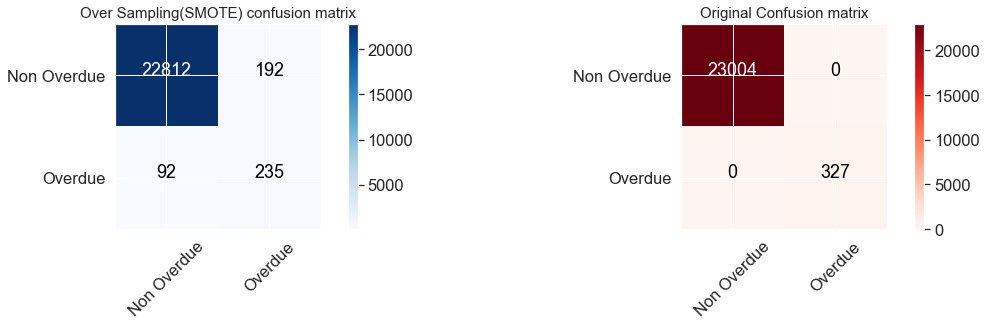

In [53]:
oversample_smote = confusion_matrix(original_ytest, rf_clf_best)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Non Overdue', 'Overdue']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="Over Sampling(SMOTE) confusion matrix", cmap=plt.cm.Blues)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Original Confusion matrix", cmap=plt.cm.Reds)

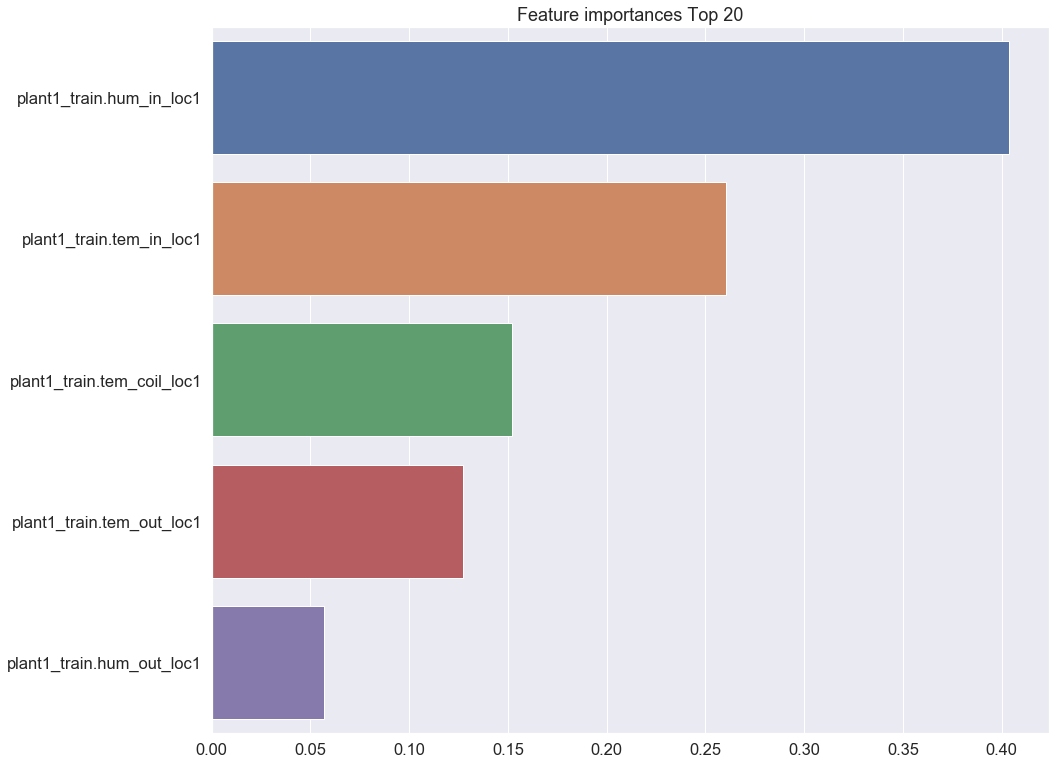

In [50]:
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=feature_names)   # 시리즈로 변환
#feature_names = X.columns.tolist() -> index 부분에 넣어준 것
# 중요도 값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

# 시각화 구현
plt.figure(figsize=(15, 13))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [52]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
#y_pred = best_dclf.predict(X_test)
#RUS_score = accuracy_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = rf_clf.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Oversampling (SMOTE)'], 'Score': [oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Oversampling (SMOTE),0.994985
